In [2]:
import sqlite3

# Connect to a SQLite database file (creates it if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Drop the table if it exists (optional clean start)
cursor.execute('DROP TABLE IF EXISTS sales')

# Create the 'sales' table
cursor.execute('''
    CREATE TABLE sales (
        sale_id INTEGER PRIMARY KEY AUTOINCREMENT,
        product_name TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price_per_unit REAL NOT NULL
    )
''')

# Insert sample sales data
sample_data = [
    ('Choclate', 10, 20),
    ('Ice Cream', 5, 30),
    ('Candy', 20, 10),
    ('Toffy', 7, 15),
    ('Cookie', 12, 45),
    ('Waffers', 5, 40)
]
cursor.executemany('INSERT INTO sales (product_name, quantity, price_per_unit) VALUES (?, ?, ?)', sample_data)

# Commit and close
conn.commit()
conn.close()

print("sales_data.db created with table 'sales' and sample data.")


sales_data.db created with table 'sales' and sample data.


In [3]:
import sqlite3

# Load the existing SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Example: Fetch the first 5 rows to verify connection
cursor.execute("SELECT * FROM sales LIMIT 5")
rows = cursor.fetchall()

# Print the results
print("Sample data from 'sales' table:")
for row in rows:
    print(row)

# Always good practice to close the connection when done
conn.close()


Sample data from 'sales' table:
(1, 'Choclate', 10, 20.0)
(2, 'Ice Cream', 5, 30.0)
(3, 'Candy', 20, 10.0)
(4, 'Toffy', 7, 15.0)
(5, 'Cookie', 12, 45.0)


In [6]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Correct SQL query
query = '''
    SELECT product_name, 
           SUM(quantity) AS total_qty, 
           SUM(quantity * price_per_unit) AS revenue 
    FROM sales 
    GROUP BY product_name
'''

# Execute and fetch results
cursor.execute(query)
results = cursor.fetchall()

# Print results
print("Product Sales Summary:")
for row in results:
    product, total_qty, revenue = row
    print(f"{product}: Total Qty = {total_qty}, Revenue = ${revenue:.2f}")

# Close connection
conn.close()


Product Sales Summary:
Candy: Total Qty = 20, Revenue = $200.00
Choclate: Total Qty = 10, Revenue = $200.00
Cookie: Total Qty = 12, Revenue = $540.00
Ice Cream: Total Qty = 5, Revenue = $150.00
Toffy: Total Qty = 7, Revenue = $105.00
Waffers: Total Qty = 5, Revenue = $200.00


In [7]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# Define the correct SQL query
query = '''
    SELECT product_name, 
           SUM(quantity) AS total_qty, 
           SUM(quantity * price_per_unit) AS revenue 
    FROM sales 
    GROUP BY product_name
'''

# Load query results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection (optional but good habit)
conn.close()

# Display the DataFrame
print(df)


  product_name  total_qty  revenue
0        Candy         20    200.0
1     Choclate         10    200.0
2       Cookie         12    540.0
3    Ice Cream          5    150.0
4        Toffy          7    105.0
5      Waffers          5    200.0


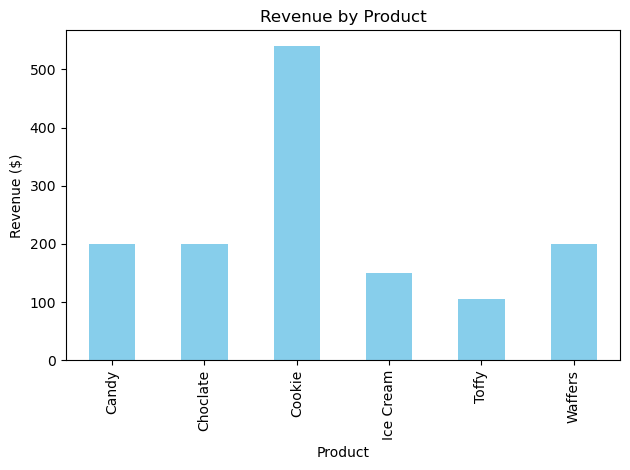

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query
query = '''
    SELECT product_name, 
           SUM(quantity) AS total_qty, 
           SUM(quantity * price_per_unit) AS revenue 
    FROM sales 
    GROUP BY product_name
'''

# Load query result into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Plotting the bar chart
df.plot(kind='bar', x='product_name', y='revenue', legend=False, color='skyblue', title='Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


In [9]:
plt.savefig("sales_chart.png")
print("Chart saved as 'sales_chart.png'")

Chart saved as 'sales_chart.png'


<Figure size 640x480 with 0 Axes>